# Interpolation Part 2: Polynomial interpolation

As you probably know, with more data points we can fit increasingly high order polynomials. For instance with three points we can fit a quadratic, four a cubic and so on. By doing so we can improve the accuracy of our approximation, obtain faster rates of convergence, and better behaviour of derivatives.

This fitting is the generalisation of the linear case above, in order to obtain the coefficients for our polynomials we are required to do a bit more work. For an $n$ degree polynomial we have

$$ p_n(x)=\sum_{j=0}^{n}a_jx^j,$$

with unknown coefficients $a_j.$ For each data point $x_k$ we can write an equation 

$$ \sum_{j=0}^{n}a_jx_k^j = y_k,$$ 

we will have $n+1$ such equations. This yields a linear system:

$$\begin{bmatrix}
    x_{0}^0 & x_0^1 & x_0^2 & \dots  & x_0^n \\
    x_{1}^0 & x_1^1 & x_1^2 & \dots  & x_1^n \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{n}^0 & x_{n}^1 & x_{n}^2 & \dots  & x_{n}^n 
\end{bmatrix}
\begin{bmatrix}a_0\\a_1\\ \vdots\\ a_n \end{bmatrix} = \begin{bmatrix}y_0\\y_1\\ \vdots\\ y_{n} \end{bmatrix}
$$

This matrix is known as the *Vandermode matrix* and since the $x_k$ are distinct it will be non-singular and the linear system can be solved to obtain the coefficients. In the $2\times 2$ linear case the simultaneous equations are easily solved by hand, for large $n$ we are best handling the solution computationally.

Numerically solving a system of linear equations like this is a common problem in computational mathematics and is a cornerstone of numerical analysis (there will be more on this at 4000 level, module code TBC). For now we will use a built in solver, see below. 

This procedure provides the *Lagrange interpolant* which you may have come across before, see below for another formula for obtaining it.

## Application
    
Numpy has a built in function `np.vander` to construct the Vandermode matrix for us, this makes polynomial interpolation very straightforward. Returning to our first example, we can fit the degree 10 polynomial through 11 data points quite easily.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})            # Increase the font size to 14pt

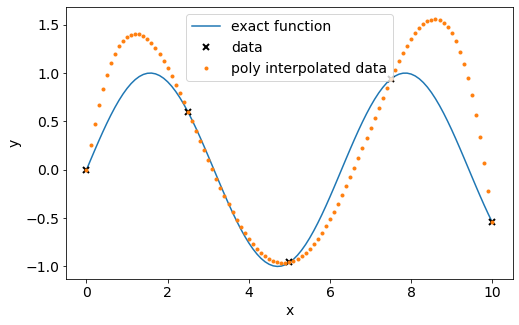

In [3]:
# The usual data set up
M = 11
x0 = np.linspace(0,10,M)
y0 = np.sin(x0)

N = 101
x = np.linspace(0,10.0,N)

A = np.vander(x0)          # construct the Vandermode matrix

a = np.linalg.solve(A,y0)  # obtain the coefficients by solving the system

y = np.zeros_like(x)
for i in range(M):         # reconstruct the new data using the coefficients
    y += a[i]*x**(M-1-i)

plt.figure(figsize=(8,5))
plt.plot(x,np.sin(x),label='exact function')
plt.plot(x0,y0,'kx',mew=2,label='data')
plt.plot(x,y,'.',label='poly interpolated data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<font color='#2F4F4F'>

### An improvement
    
Above we wrote a loop to make it clear how the polynomial is reconstructed, but again we can improve the efficiency by using array broadcasting. In this case we obtain an $N\times M$ array of all combinations of evaluation points and powers, multiply each row by the required coefficient and then sum each column.

In [3]:
pows = (M-1-np.arange(M)).reshape(M,1)         # these are the exponents required
xnew = np.reshape(x,(1,N))                     # reshape for the broadcast
ynew = np.sum((xnew**pows)*a.reshape(M,1),axis=0) # multiply by coefficients and sum along the right direction

print(np.max(np.abs(ynew-y)))  # check we get the same answer

0.0


The Lagrange polynomial interpolant is often alternatively expressed as 

$$p_n(x)=\sum_{j=1}^n \prod_{k=1,\,k\neq j}^n\frac{x-x_k}{x_j-x_k}f(x_j), $$

which incurs the same computational cost but arguably requires a more involved code than the nice modular format provided by the Vandermode method.


----

## Errors

As for the linear case, error analysis can be performed for any degree of polynomial fit, what is found is that the maximum error can be expressed as

$$\max |f(x) - p_n(x)| = \frac{\max \prod_{k=0}^n|x-x_k|}{(n+1)!}\max_{x_0\leq u \leq x_n}|f^{(n+1)}(u)|,$$ 

where $f^{(n)}$ is the $n^{th}$ derivative of $f.$ For equally spaced points we have an error bound which states

$$ |f(x) - p_n(x)|\leq \frac{h^{n+1}}{4(n+1)}\max_{x_0\leq u \leq x_n}|f^{(n+1)}(u)|$$

where $h$ is the usual stepsize. In the linear case we found errors decreasing like $h^2,$ which is generalised here to show that convergence is like $h^{n+1}.$ In other words we can expect increasing improvements on reducing $h$ as the order of the polynomial increases.

As is often the case, thre are exceptions to this rule. These results assume that the size of the derivatives is small. In particular, for the regularly spaced bound we have assumed $f^{(n+1)}h^{n+1}\ll 1,$ which needen't always be the case.

## Runge's phenomenon

Let us examine the case of interpolating *Runge's function* 

$$f(x)=\frac{1}{1+25x^2}$$ 

on the interval $x\in[-1,1]$


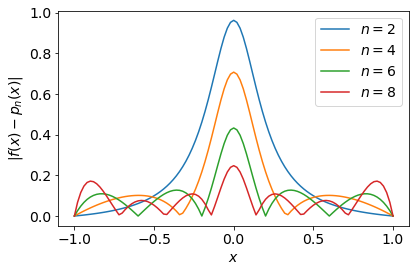

In [4]:
# The usual data set up

def f(x):
    return 1./(1+25*x**2)

N = 101
x = np.linspace(-1,1,N)

plt.figure(figsize=(6,4))

for M in range(2,9,2):       # loop over several "degrees" or "knots"
    x0 = np.linspace(-1,1,M)
    y0 = f(x0)

    A = np.vander(x0)          # construct the Vandermode matrix
    a = np.linalg.solve(A,y0)  # obtain the coefficients by solving the system
    pows = (M-1-np.arange(M)).reshape(M,1)         # these are the exponents required
    xnew = np.reshape(x,(1,N))                     # reshape for the broadcast
    y = np.sum((xnew**pows)*a.reshape(M,1),axis=0) # multiply by coefficients and sum along the right direction

    lbl = '$n = $'+str(M)
    plt.plot(x,np.abs(y-f(x)),label=lbl)
    
plt.xlabel('$x$')
plt.ylabel('$|f(x)-p_n(x)|$')
plt.legend()
plt.tight_layout()
plt.show()

Notice that, while the error in the middle of the domain *is* decreasing on increasing $n,$ the error at the edges is increasing, and in fact the maximum error starts growing as $n$ increases.

As we pointed out above, the error depends on the size of the derivatives of $f(x),$ it turns out that this functions has derivatives which grow as $n$ increases on this interval. We can check this easily in Python.

Let's use `sympy` to make our life a bit easier


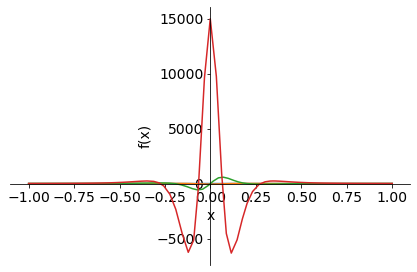

150000000*x**4/(25*x**2 + 1)**5 - 4500000*x**2/(25*x**2 + 1)**4 + 15000/(25*x**2 + 1)**3

In [5]:
import sympy as sp
from sympy.plotting import plot

x, y = sp.symbols('x y')

y = 1/(1+25*x**2)    # define the function

f1 = sp.diff(y,x)    # first derivative
f2 = sp.diff(f1,x)   # second derivative
f3 = sp.diff(f2,x)   # third
f4 = sp.diff(f3,x)   # fourth

plot(f1,f2,f3,f4,(x,-1,1))  # plot them on our interval

f4

Notice the size of the derivative is largest at the centre of the domain, however the errors grow at the edges. This is simply because the interpolant is somehow least constrained by the data there; the error is occuring due to the interpolant's diffculty in capturing these large derivatives.

This is where the piecewise description we discussed in the previous notebook can return to help out. Rather than attempt to fit an $n-1$ degree polynomial to our $n$ data points, we choose a smaller degree polynomial and fit it through subsets or subintervals of the $n$ data points.